In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [2]:
class AgentState(TypedDict):
    name: str
    age: int
    skill: List[str]
    final: str

In [3]:
def first_node(state: AgentState) -> AgentState:
    state["final"] = f"Hello dear, {state['name']} Welcome to the world of LangGraph!"
    return state

def second_node(state: AgentState) -> AgentState:
    state["final"] = state["final"] + f" Your age is {state['age']}."
    return state

def third_node(state: AgentState) -> AgentState:
    state["final"] = state["final"] + f" Your skills are {', '.join(state['skill'])}."
    return state

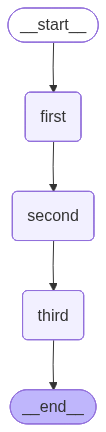

In [4]:
graph = StateGraph(AgentState)
graph.add_node("first", first_node)
graph.add_node("second", second_node)
graph.add_node("third", third_node)
graph.set_entry_point("first")
graph.add_edge("first", "second")
graph.add_edge("second", "third")
graph.set_finish_point("third")
app = graph.compile()
app

In [5]:
result = app.invoke({"name": "Alice","age": 30, "skill": ["Python", "LangGraph"]})
result["final"]

'Hello dear, Alice Welcome to the world of LangGraph! Your age is 30. Your skills are Python, LangGraph.'